In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import matplotlib
import aplpy
from astroquery.sdss import SDSS
from astroquery.skyview import SkyView
from astropy.coordinates import Angle
import time
from astropy.table import Table
import heapq
from math import log10, floor
import matplotlib.mlab as mlab

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
#Region of Sky:

RA=196.875
DE=51.0
RA_length=35.625
DE_length=6.0

#Catalogues:

First_Catalogue_Name='LOTSS'
Second_Catalogue_Name='TGSS'

In [3]:
#Name of Flux in Catalogue..

First_Flux='FTot'
Second_Flux='Stotal'

#And their error
First_Flux_error='e_'+First_Flux
Second_Flux_error='e_'+Second_Flux

In [5]:
#Retrieving first catalogue data:
First_Catalogue_Data= Table.read('data/'+First_Catalogue_Name+'.fit', format='fits')

#Retrieving second catalogue data:
Second_Catalogue_Data= Table.read('data/'+Second_Catalogue_Name+'.fit', format='fits')

In [6]:
#Making array for first catalogue in region of the sky chosen 

n=0
RA_First=[]
DE_First=[]
Lum_First=[]
RA_First_e=[]
DE_First_e=[]
Lum_First_e=[]
while n< len(First_Catalogue_Data):
    if RA-RA_length<First_Catalogue_Data["RAJ2000"][n] and First_Catalogue_Data["RAJ2000"][n]<RA+RA_length and DE-DE_length<First_Catalogue_Data["DEJ2000"][n] and First_Catalogue_Data["DEJ2000"][n]<DE+DE_length:
        RA_First.append(First_Catalogue_Data["RAJ2000"][n])
        DE_First.append(First_Catalogue_Data["DEJ2000"][n])
        Lum_First.append(First_Catalogue_Data[First_Flux][n]/1000)
        RA_First_e.append(First_Catalogue_Data["e_RAdegtot"][n]/3600)
        DE_First_e.append(First_Catalogue_Data["e_DEdegtot"][n]/3600)
        Lum_First_e.append(First_Catalogue_Data[First_Flux_error][n]/1000)
    n=n+1

#Making array for second catalogue in region of the sky chosen  
    
n=0
RA_Second=[]
DE_Second=[]
Lum_Second=[]
RA_Second_e=[]
DE_Second_e=[]
Lum_Second_e=[]
while n< len(Second_Catalogue_Data):
    if RA-RA_length<Second_Catalogue_Data["RAJ2000"][n] and Second_Catalogue_Data["RAJ2000"][n]<RA+RA_length and DE-DE_length<Second_Catalogue_Data["DEJ2000"][n] and Second_Catalogue_Data["DEJ2000"][n]<DE+DE_length:
        RA_Second.append(Second_Catalogue_Data["RAJ2000"][n])
        DE_Second.append(Second_Catalogue_Data["DEJ2000"][n])
        Lum_Second.append(Second_Catalogue_Data[Second_Flux][n]/1000)
        RA_Second_e.append(Second_Catalogue_Data["e_RAJ2000"][n]/3600)
        DE_Second_e.append(Second_Catalogue_Data["e_DEJ2000"][n]/3600)
        Lum_Second_e.append(Second_Catalogue_Data[Second_Flux_error][n]/1000)
    n=n+1


/Users/niallbradley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


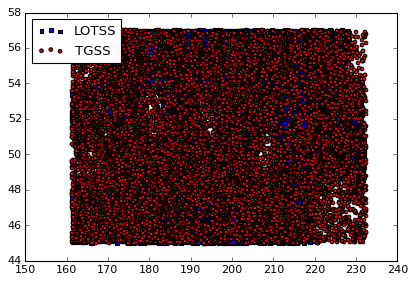

In [7]:
#Plotting coords of two arrays to compare

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_First, DE_First, s=10, c='b', marker="s", label=First_Catalogue_Name)
ax1.scatter(RA_Second,DE_Second, s=10, c='r', marker="o", label=Second_Catalogue_Name)
plt.legend(loc='upper left');
plt.show()

In [8]:
start_time = time.time()
#This loop finds common stars between catalogues:

#Creating new arrays:

#Luminosities of stars in common(and error)
Lum_First_Relevant=[]
Lum_Second_Relevant=[]
Lum_First_Relevant_e=[]
Lum_Second_Relevant_e=[]

#Coordinates of stars in common(and error)
RA_First_Relevant=[]
RA_Second_Relevant=[]
DE_First_Relevant=[]
DE_Second_Relevant=[]
RA_First_Relevant_e=[]
RA_Second_Relevant_e=[]
DE_First_Relevant_e=[]
DE_Second_Relevant_e=[]

#Creating new variables

#index for first catalogue:
f=0
#index for second catalogue:
s=0
#number of iterations:
it=0
#Number of stars in both catalogues
corr=1

#While loop goes through all of first catalogue..
while f<len(RA_First):
    #If it compares a source in first catalogue to every source in second without finding one in common then..
    if s==len(RA_Second):
        #It moves on to next source in first and..
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #This is a formula for overlapping rectangles with the sides being the error
    #If this is true catalogues have that source in common
    elif RA_First_e[f]+RA_Second_e[s]>= abs(RA_First[f]-RA_Second[s]) and DE_First_e[f]+DE_Second_e[s]>= abs(DE_First[f]-DE_Second[s]):
        #Making arrays of flux of sources in common (and error)
        Lum_First_Relevant.append((Lum_First[f]))
        Lum_Second_Relevant.append(Lum_Second[s])
        Lum_First_Relevant_e.append((Lum_First_e[f]))
        Lum_Second_Relevant_e.append(Lum_Second_e[s])
        
        #Making arrays of coordinates of sources in common 
        RA_First_Relevant.append(RA_First[f])
        RA_Second_Relevant.append(RA_Second[s])
        RA_First_Relevant_e.append(RA_First_e[f])
        RA_Second_Relevant_e.append(RA_Second_e[s])
        DE_First_Relevant.append(DE_First[f])
        DE_Second_Relevant.append(DE_Second[s])
        DE_First_Relevant_e.append(DE_First_e[f])
        DE_Second_Relevant_e.append(DE_Second_e[s])
        
        #Number of common sources increased
        corr=corr+1
        #Move onto next source in first catalogue
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #If neither of these are true then..
    else:
        #Try next source in second catalogue
        s=s+1
    #Before going onto next loop increase number of iterations
    it=it+1
print("--- %s seconds ---" % (time.time() - start_time))

--- 375.430721998 seconds ---


In [9]:
print "Number of iterations:",it
print "Number of stars corrolated:",corr

Number of iterations: 398647014
Number of stars corrolated: 7373


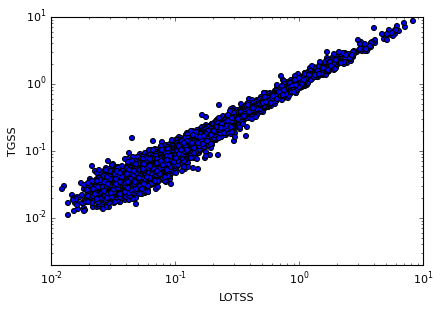

In [10]:
#Plotting Luminosities (unit Jy, log scale)

if corr>0:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(Lum_First_Relevant, Lum_Second_Relevant)
    plt.xlabel(First_Catalogue_Name)
    plt.ylabel(Second_Catalogue_Name)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.01,10)
    plt.ylim(0,10)
    plt.show()

In [11]:
#Defining new variables
Fractional_Diff=0
n=0
m=0
Fractional_Diff_list=[]

#This loop goes through the whole lists of common sources

while n<corr-1:
    
    #Calculates nth fractional change
    Fractional_Diff=(abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n]))/Lum_First_Relevant[n]
    #Creates an array of fractional changes
    Fractional_Diff_list.append(Fractional_Diff)
    n=n+1

#When loop is finished it will have found the biggest change in the list

0.0843640722445
0.0931777264278


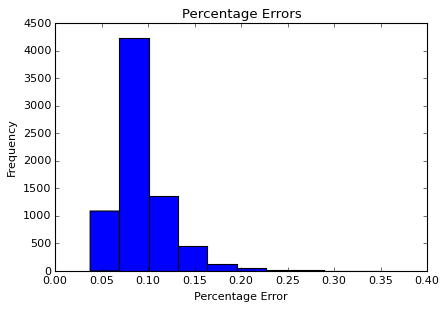

In [26]:
#Some simple statistical analyses on the code:

#Creat new array and variable
total_percentage_errors_list=[]
n=0

#This loop goes through the list of fractional changes and..
while n<len(Fractional_Diff_list):
    
    #..calculates the error on these changes before..
    error_first=(Lum_First_Relevant_e[n]/Lum_First_Relevant[n])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[n]+Lum_First_Relevant_e[n])/(Lum_First_Relevant[n]+Lum_Second_Relevant[n]))
    
    #..adding them to the new list.
    total_percentage_errors_list.append(total_percentage_error)
    
    n=n+1

#Plotting the errors in a histogram
plt.hist(total_percentage_errors_list)
plt.title("Percentage Errors")
plt.xlabel("Percentage Error")
plt.ylabel("Frequency")
fig = plt.gcf()

#Calculating the mean and the median:
mean=np.mean(total_percentage_errors_list)
med= np.median(total_percentage_errors_list)
print med
print mean

In [82]:
#FIRST VARIATION

#Number of sources with largest changes in flux you want:
size=10
#Radius you want simbad to loop at:
sim_rad='0d0m10s'

#This function rounds a number to one significant figure and will be used later
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

#Create a list of the largest 'size' fractional changes in flux:
Largest_Fractional_Diffs=heapq.nlargest(size,Fractional_Diff_list)

#Set new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]
n=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while n<size:
    
    #..creates lists of their indexes and coordinates...
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
    Big_Change_indexes.append(ind)
    Big_Change_RAs.append(RA_First_Relevant[ind])
    Big_Change_DEs.append(DE_First_Relevant[ind])
    
    #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
    #printing relevant information:
    print n,":"
    print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
    print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
    print "Coordinates:",Big_Change_RAs[n],Big_Change_DEs[n]
    print "Total percentage error:",round_to_1(total_percentage_error)
    
    #This finds all the objects on Simbad within 10" of the relevant source
    Simbad_table=Simbad.query_region(coord.SkyCoord(Big_Change_RAs[n], Big_Change_DEs[n],unit=(u.deg, u.deg)),radius=sim_rad)
    
    #If no source is found on Simbad then..
    if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
    #If there is source(s) found then...
    else:
        #print relevant information from Simbad
        print Simbad_table["MAIN_ID","RA","DEC"]
        print "http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
    
    print ""
    print ""
    print ""
    n=n+1


0 :
Change in flux: 2.53010156831 ± 0.3
Respective fluxes: 0.04461628 0.1575
Coordinates: 203.036 47.11892
Total percentage error: 0.1
==>no source found on SIMBAD



1 :
Change in flux: 1.71487944864 ± 0.3
Respective fluxes: 0.02147425 0.0583
Coordinates: 217.38867 47.25709
Total percentage error: 0.2
==>no source found on SIMBAD



2 :
Change in flux: 1.41386324135 ± 0.2
Respective fluxes: 0.02895773 0.0699
Coordinates: 206.76624 46.42481
Total percentage error: 0.1
==>no source found on SIMBAD



3 :
Change in flux: 1.38031032604 ± 0.3
Respective fluxes: 0.01264541 0.0301
Coordinates: 172.18192 47.14743
Total percentage error: 0.2
==>no source found on SIMBAD



4 :
Change in flux: 1.20353437537 ± 0.1
Respective fluxes: 0.04265874 0.094
Coordinates: 229.18089 48.48004
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J151643+482848 15 16 43.20 +48 28 48.0
http://simbad.

In [80]:
#SECOND VARIATION

#Number of sources with largest changes in flux you want:
size=10
#Radius you want simbad to loop at:
sim_rad='0d0m10s'

#Create a list of the  fractional changes in flux from largest to smallest:
Largest_Fractional_Diffs=sorted(Fractional_Diff_list,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Fractional_Diffs):
        #...print this and stop the loop
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
    
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
    #This finds all the objects on Simbad within 10" of the relevant source
    Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius=sim_rad)
    
    #This loop only prints information if it can be found on Simbad:
    if  Simbad_table:
        
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        print Simbad_table["MAIN_ID","RA","DEC"]
        print "http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
        print ""
        print ""
        print ""
        m=m+1
    n=n+1


0 :
Change in flux: 1.20353437537 ± 0.1
Respective fluxes: 0.04265874 0.094
Coordinates: 229.18089 48.48004
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J151643+482848 15 16 43.20 +48 28 48.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J151643%2B482848&NbIdent=1&Radius=0d0m10s&Radius.unit=arcsec&submit=submit+id



1 :
Change in flux: 1.20242957567 ± 0.3
Respective fluxes: 0.01216838 0.0268
Coordinates: 217.93641 46.41554
Total percentage error: 0.2
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J143144+462457 14 31 44.51 +46 24 57.1
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J143144%2B462457&NbIdent=1&Radius=0d0m10s&Radius.unit=arcsec&submit=submit+id



2 :
Change in flux: 1.14764361292 ± 0.3
Respective fluxes: 0.22438546 0.4819
Coordinates: 163.93772 45.40041


In [79]:
#THIRD VARIATION

#Number of sources with largest changes in flux you want:
size=10
#Radius you want simbad to loop at:
sim_rad='10' #in arcseconds

#Create a list of the largest fractional changes in flux:
Largest_Fractional_Diffs=sorted(Fractional_Diff_list,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Fractional_Diffs):
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
 
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
     #This finds all the objects on Simbad within 10" of the relevant source
    Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    
    #This loop only prints information if the percentage error on the data is below a certain threshold
    if  total_percentage_error<=0.1:
    
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        
        #If no source is found on Simbad then..
        if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
        #If there is source(s) found then...
        else:
            #print relevant information from Simbad
            print Simbad_table["MAIN_ID","RA","DEC"]
            print "http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
        
        print ""
        print ""
        print ""
        m=m+1
    n=n+1


0 :
Change in flux: 0.810995328782 ± 0.08
Respective fluxes: 0.041745 0.0756
Coordinates: 196.56695 49.70918
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J130616+494234 13 06 16.00 +49 42 33.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J130616%2B494234&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



1 :
Change in flux: 0.658090030701 ± 0.05
Respective fluxes: 0.09300694 0.0318
Coordinates: 183.68359 54.58016
Total percentage error: 0.07
==>no source found on SIMBAD



2 :
Change in flux: 0.657098924163 ± 0.06
Respective fluxes: 0.15368864 0.0527
Coordinates: 186.47155 53.15344
Total percentage error: 0.08
==>no source found on SIMBAD



3 :
Change in flux: 0.619915950369 ± 0.05
Respective fluxes: 0.07051072 0.0268
Coordinates: 201.21004 56.65039
Total percentage error: 0.08
==>no source found on SIMBAD



4 :
Change in flux: 0.611234084466 ± 0.05
R

In [85]:
#FOURTH VARIATION

#Number of sources with largest changes in flux you want:
size=50
#Radius you want simbad to loop at:
sim_rad='10' #in arcseconds

#Create a list of the largest fractional changes in flux:
Largest_Fractional_Diffs=sorted(Fractional_Diff_list,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Fractional_Diffs):
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
 
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
     #This finds all the objects on Simbad within 10" of the relevant source
    Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m'+sim_rad+'s')
    
    #This loop only prints information if the percentage error on the data is below a certain threshold
    #And there's data available on Simbad
    if  total_percentage_error<=0.1 and Simbad_table:
    
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        
        #If no source is found on Simbad then..
        if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
        #If there is source(s) found then...
        else:
            #print relevant information from Simbad
            print Simbad_table["MAIN_ID","RA","DEC"]
            print "http://simbad.u-strasbg.fr/simbad/sim-id?Ident="+(Simbad_table["MAIN_ID"][0].replace("+","%2B")).replace(" ", "+")+"&NbIdent=1&Radius="+sim_rad+"&Radius.unit=arcsec&submit=submit+id"
        
        print ""
        print ""
        print ""
        m=m+1
    n=n+1


0 :
Change in flux: 0.810995328782 ± 0.08
Respective fluxes: 0.041745 0.0756
Coordinates: 196.56695 49.70918
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J130616+494234 13 06 16.00 +49 42 33.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J130616%2B494234&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



1 :
Change in flux: 0.611234084466 ± 0.05
Respective fluxes: 0.05709909 0.092
Coordinates: 211.90289 48.62731
Total percentage error: 0.09
         MAIN_ID                RA           DEC     
                             "h:m:s"       "d:m:s"   
------------------------- ------------- -------------
[VV2010] J140736.7+483737 14 07 36.6473 +48 37 37.500
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=[VV2010]+J140736.7%2B483737&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



2 :
Change in flux: 0.604526542666 ± 0.05
Respective fluxes: 0.0601810

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:11:28.5624 +55:25:10.992': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:50:41.8152 +47:32:06.936': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:50:57.5112 +45:27:13.896': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

22 :
Change in flux: 0.512402782474 ± 0.05
Respective fluxes: 0.0662432 0.0323
Coordinates: 196.62526 54.24506
Total percentage error: 0.09
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J130630+541441 13 06 30.00 +54 14 42.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J130630%2B541441&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



23 :
Change in flux: 0.510644503317 ± 0.04
Respective fluxes: 0.11750149 0.0575
Coordinates: 184.51345 53.31062
Total percentage error: 0.08
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J121803+531838 12 18 03.2 +53 18 39
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J121803%2B531838&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:02:33.996 +56:37:40.188': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:07:28.32 +53:46:52.068': No astronomical object found :
  (error.line, error.msg))


24 :
Change in flux: 0.509547921255 ± 0.04
Respective fluxes: 0.05505125 0.027
Coordinates: 186.74942 49.94632
Total percentage error: 0.09
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J122659+495651 12 26 59.80 +49 56 46.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J122659%2B495651&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



25 :
Change in flux: 0.508473301689 ± 0.04
Respective fluxes: 0.29108901 0.4391
Coordinates: 230.41461 49.25821
Total percentage error: 0.08
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J152139+491530 15 21 39.6 +49 15 30
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J152139%2B491530&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



26 :
Change in flux: 0.50830491098 ± 0.04
Respective fluxes: 0.09396067 0.0462
Coordinates: 163.46368 53.17269
Total percen

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:39:20.2944 +54:32:43.584': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '15:14:42.7992 +53:21:24.624': No astronomical object found :
  (error.line, error.msg))


27 :
Change in flux: 0.506402796903 ± 0.04
Respective fluxes: 0.06300684 0.0311
Coordinates: 165.27792 46.6126
Total percentage error: 0.09
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J110107+463646 11 01 06.70 +46 36 46.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J110107%2B463646&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:13:43.5624 +50:29:07.116': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:09:52.5936 +56:51:49.32': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:58:52.5936 +51:11:59.46': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning

28 :
Change in flux: 0.501416128899 ± 0.04
Respective fluxes: 0.07962552 0.0397
Coordinates: 199.58039 56.83339
Total percentage error: 0.07
         MAIN_ID                RA           DEC     
                             "h:m:s"       "d:m:s"   
------------------------- ------------- -------------
[VV2006] J131819.3+564959 13 18 19.2474 +56 49 59.315
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=[VV2006]+J131819.3%2B564959&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:44:27.3624 +46:40:31.98': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:19:03.6984 +49:20:22.596': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:08:37.4088 +54:16:11.856': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warnin

29 :
Change in flux: 0.495501186669 ± 0.04
Respective fluxes: 0.06382572 0.0322
Coordinates: 205.36053 55.91791
Total percentage error: 0.08
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J134126+555504 13 41 26.50 +55 55 04.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J134126%2B555504&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



30 :
Change in flux: 0.495374375775 ± 0.05
Respective fluxes: 0.04518201 0.0228
Coordinates: 192.86989 55.1695
Total percentage error: 0.09
        MAIN_ID               RA          DEC     
                           "h:m:s"      "d:m:s"   
------------------------ ------------ ------------
SDSS J125128.76+551009.3 12 51 28.767 +55 10 09.37
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=SDSS+J125128.76%2B551009.3&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



31 :
Change in flux: 0.494416752271 ± 0.04
Respective fluxes: 0.06527115 0.033

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:28:57.8928 +52:41:34.188': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:19:43.9512 +56:36:12.636': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:23:42.1368 +50:09:37.404': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

32 :
Change in flux: 0.489825815793 ± 0.04
Respective fluxes: 0.12662342 0.0646
Coordinates: 179.48377 55.45367
Total percentage error: 0.08
 MAIN_ID        RA           DEC     
             "h:m:s"       "d:m:s"   
--------- ------------- -------------
NGC  3998 11 57 56.1333 +55 27 12.922
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC++3998&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



33 :
Change in flux: 0.488791528734 ± 0.04
Respective fluxes: 0.06650907 0.034
Coordinates: 205.4587 50.22619
Total percentage error: 0.09
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J134150+501335 13 41 50.00 +50 13 34.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J134150%2B501335&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:53:27.5568 +54:31:07.608': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:40:10.5936 +45:34:13.476': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:02:33.9072 +54:50:31.704': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

34 :
Change in flux: 0.485448000342 ± 0.05
Respective fluxes: 0.06821468 0.0351
Coordinates: 185.14518 50.7491
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J122034+504457 12 20 34.80 +50 44 57.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J122034%2B504457&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



35 :
Change in flux: 0.484856934736 ± 0.04
Respective fluxes: 0.07473652 0.0385
Coordinates: 214.5726 46.44813
Total percentage error: 0.09
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J141817+462651 14 18 17.60 +46 26 53.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J141817%2B462651&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:13:28.8312 +55:14:50.028': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:14:27.6432 +55:12:13.392': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:43:59.4816 +45:06:37.692': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

36 :
Change in flux: 0.478694144373 ± 0.04
Respective fluxes: 0.65679573 0.9712
Coordinates: 226.02928 53.1186
Total percentage error: 0.09
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J150407+530706 15 04 07.1 +53 07 06
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J150407%2B530706&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:40:59.9352 +54:59:40.92': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:36:54.0984 +52:43:10.056': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:07:21.0648 +55:14:44.016': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warnin

37 :
Change in flux: 0.475219955706 ± 0.03
Respective fluxes: 0.30260297 0.1588
Coordinates: 182.22626 54.69951
Total percentage error: 0.07
       MAIN_ID               RA           DEC     
                          "h:m:s"       "d:m:s"   
---------------------- ------------- -------------
7C 120624.60+545837.00 12 08 54.2564 +54 41 58.162
GALEX J120854.2+544158    12 08 54.2     +54 41 58
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=7C+120624.60%2B545837.00&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:08:09.8376 +55:36:06.084': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:15:51.4536 +49:08:46.536': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:26:45.084 +53:52:05.232': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warnin

38 :
Change in flux: 0.469210938063 ± 0.05
Respective fluxes: 1.90040785 2.7921
Coordinates: 231.25771 53.5702
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J152501+533410 15 25 01.81 +53 34 10.7
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J152501%2B533410&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:47:16.0752 +55:48:10.188': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:01:56.1984 +46:07:23.664': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:45:41.3712 +55:07:10.488': No astronomical object found :
  (error.line, error.msg))


39 :
Change in flux: 0.466693935937 ± 0.05
Respective fluxes: 1.67069621 2.4504
Coordinates: 229.95026 47.53179
Total percentage error: 0.1
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J151948+473153 15 19 48.1 +47 31 54
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J151948%2B473153&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:02:08.5032 +54:00:45.9': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:24:44.532 +46:24:54.9': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:42:58.0872 +53:34:24.816': No astronomical object found :
  (error.line, error.msg))


40 :
Change in flux: 0.46128886028 ± 0.03
Respective fluxes: 0.09801171 0.0528
Coordinates: 178.00303 48.29317
Total percentage error: 0.07
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J115200+481735 11 52 00.9 +48 17 38
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J115200%2B481735&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



41 :
Change in flux: 0.460020301787 ± 0.04
Respective fluxes: 0.05518726 0.0298
Coordinates: 187.83682 48.48206
Total percentage error: 0.09
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J123120+482851 12 31 20.70 +48 28 56.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J123120%2B482851&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '10:47:45.7752 +52:16:02.892': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:45:10.2936 +50:38:07.476': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:49:11.8872 +53:32:57.156': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warni

42 :
Change in flux: 0.454439523305 ± 0.04
Respective fluxes: 0.28368316 0.4126
Coordinates: 198.68101 52.44436
Total percentage error: 0.08
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J131443+522640 13 14 43.4 +52 26 39
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J131443%2B522640&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



43 :
Change in flux: 0.453842003045 ± 0.03
Respective fluxes: 0.07781631 0.0425
Coordinates: 165.54545 47.48899
Total percentage error: 0.07
        MAIN_ID               RA          DEC     
                           "h:m:s"      "d:m:s"   
------------------------ ------------ ------------
SDSS J110210.88+472922.2 11 02 10.880 +47 29 22.26
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=SDSS+J110210.88%2B472922.2&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:46:43.9464 +56:30:02.016': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:04:18.06 +55:14:20.328': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:40:11.2272 +48:47:11.076': No astronomical object found :
  (error.line, error.msg))


44 :
Change in flux: 0.452158986801 ± 0.04
Respective fluxes: 0.06589503 0.0361
Coordinates: 179.97638 49.88479
Total percentage error: 0.09
      MAIN_ID            RA          DEC     
                      "h:m:s"      "d:m:s"   
------------------- ------------ ------------
NVSS J115954+495308 11 59 54.330 +49 53 05.50
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J115954%2B495308&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:40:44.4744 +46:10:29.064': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:32:01.3224 +54:01:07.5': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:01:47.9856 +50:31:14.628': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning

45 :
Change in flux: 0.446086172723 ± 0.04
Respective fluxes: 0.05163258 0.0286
Coordinates: 191.38293 54.73765
Total percentage error: 0.09
 MAIN_ID       RA          DEC     
            "h:m:s"      "d:m:s"   
--------- ------------ ------------
NGC  4675 12 45 31.915 +54 44 15.19
 SN 1997Y  12 45 31.40  +54 44 17.0
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC++4675&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:00:34.4712 +54:32:26.016': No astronomical object found :
  (error.line, error.msg))


46 :
Change in flux: 0.445716538882 ± 0.04
Respective fluxes: 0.75588815 1.0928
Coordinates: 202.07499 46.7727
Total percentage error: 0.08
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J132818+464622 13 28 17.9 +46 46 17
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J132818%2B464622&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



47 :
Change in flux: 0.444996872768 ± 0.04
Respective fluxes: 1.2611792 1.8224
Coordinates: 227.5842 52.74185
Total percentage error: 0.09
      MAIN_ID           RA        DEC   
                     "h:m:s"    "d:m:s" 
------------------- ---------- ---------
NVSS J151020+524430 15 10 20.2 +52 44 30
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J151020%2B524430&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:21:10.524 +55:12:44.496': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:02:30.7992 +54:14:18.564': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '12:48:07.1208 +55:58:58.296': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warnin

48 :
Change in flux: 0.439616285248 ± 0.03
Respective fluxes: 0.08440645 0.0473
Coordinates: 171.89146 56.70078
Total percentage error: 0.07
        MAIN_ID               RA         DEC    
                           "h:m:s"     "d:m:s"  
------------------------ ----------- -----------
     NVSS J112734+564206 11 27 34.11 +56 42 06.2
SDSS J112734.59+564202.9 11 27 34.57 +56 42 02.8
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J112734%2B564206&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id



49 :
Change in flux: 0.439174687985 ± 0.04
Respective fluxes: 0.05384921 0.0302
Coordinates: 165.8169 52.14311
Total percentage error: 0.08
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J110316+520837 11 03 16.12 +52 08 37.9
http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NVSS+J110316%2B520837&NbIdent=1&Radius=10&Radius.unit=arcsec&submit=submit+id





INFO: Auto-setting vmin to  1.226e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.479e+04 [aplpy.core]


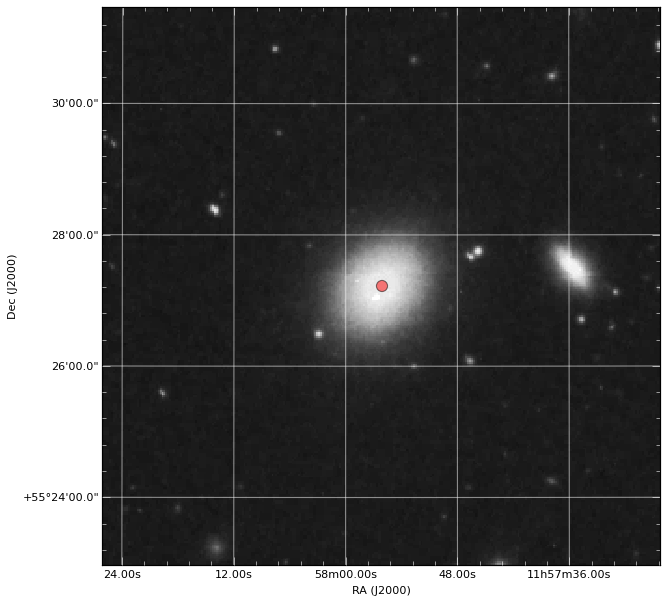

In [87]:
#This displays image of a correlated source

#Which source to show:
x=32

#Coordinates of this star:
pos=coord.SkyCoord(Big_Change_RAs[x]*u.deg, Big_Change_DEs[x]*u.deg)
ra=np.array([Big_Change_RAs[x]])
de=np.array([Big_Change_DEs[x]])
#Find image from DSS:
images = SkyView.get_images(pos,survey=['DSS'])
print images[0]

CV = aplpy.FITSFigure(images[0])


#Gives in grid and makes it grayscale (can also be made colorscale)
CV.show_grayscale()
CV.add_grid()

#This plots a circle where the relevant source should be 
x_pix, y_pix = CV.world2pixel(ra,de)
plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
plt.show()